## Bank Marketing
To analyze and model the bank.csv dataset, we import necessary libraries, including pandas, seaborn, and matplotlib, as shown below:

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

then load the dataset and display it using pandas:

In [2]:
# load dataset
df = pd.read_csv("bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


To get a summary of numerical variables in the dataset, we use the describe() function:

In [3]:
# get summary statistics of numerical variables
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


then select only the integer columns and create a correlation matrix using seaborn's heatmap function:

<Axes: >

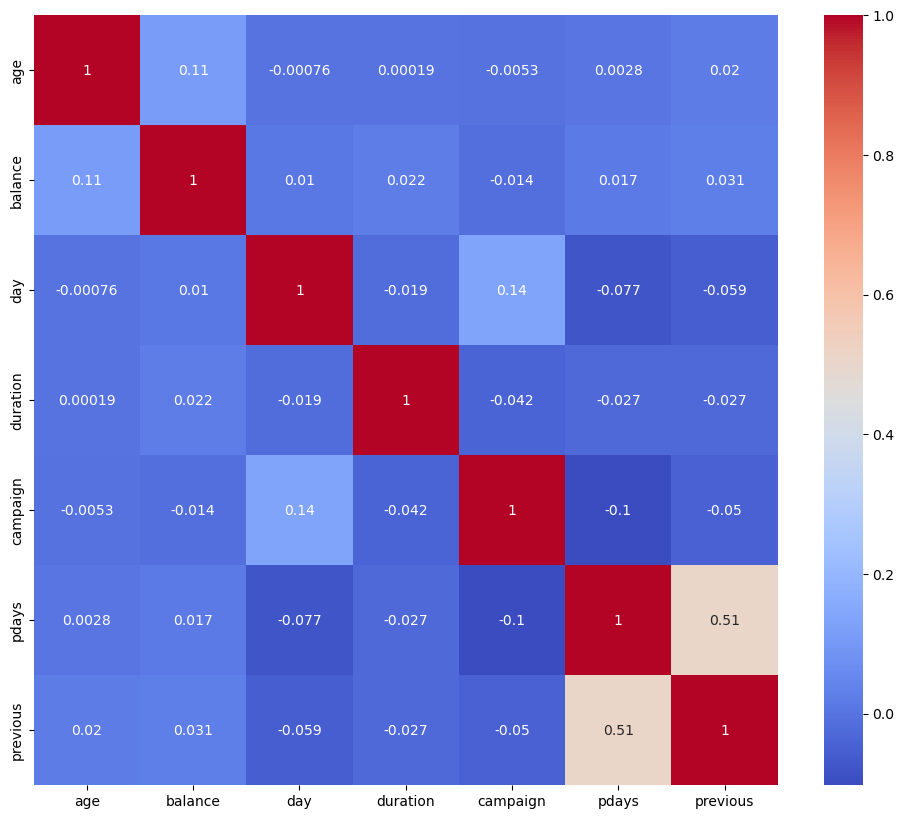

In [4]:
# select integer columns and create correlation matrix
int_cols = df.select_dtypes(include=['int64']).columns
int_df = df[int_cols]
corr_matrix = int_df.corr()

# create a heatmap using seaborn
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

To check for duplicated values in the dataset, we use the duplicated() function:

In [5]:
# check for duplicated values
print(df.duplicated().value_counts())

False    11162
dtype: int64


then split the dataset into the input features (X) and the target variable (y):

In [6]:
# split the data into X and y
X = df.drop(columns=["deposit"])
y = df['deposit']

To encode categorical columns, we use the LabelEncoder() function and loop through categorical columns to encode them:

In [7]:
# label encode the categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

then split the data into train and test sets using the train_test_split() function:

In [8]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=160)

Define the number of folds for cross-validation and also Create a k-fold cross-validation object

In [9]:
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=160)

To create a logistic regression pipeline, we use the make_pipeline() function and LogisticRegression() function:

In [10]:
# create a logistic regression pipeline
lr_pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=160,solver='liblinear'))

### create a logistic regression pipeline


In [11]:
lr_pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=160,solver='liblinear'))

then define hyperparameters to search over and create a grid search object with k-fold cross-validation:

In [12]:
lr_params = {'logisticregression__C': [0.1, 1, 10, 100]}

lr_grid = GridSearchCV(lr_pipeline, lr_params, cv=kf, scoring='accuracy')

Create a k-fold cross-validation object

In [13]:
# fit the grid search object to the training data
lr_grid.fit(X_train, y_train)

# get the best hyperparameters
best_params = lr_grid.best_params_

# create a new model with the best hyperparameters
lr_model = make_pipeline(StandardScaler(), LogisticRegression(C=best_params['logisticregression__C'], random_state=160))

# fit the model to the training data
lr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.1, random_state=160))])

To evaluate the logistic regression model, we use the classification_report() function and plot the confusion matrix using seaborn:

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          no       0.78      0.83      0.81       562
         yes       0.81      0.77      0.79       555

    accuracy                           0.80      1117
   macro avg       0.80      0.80      0.80      1117
weighted avg       0.80      0.80      0.80      1117



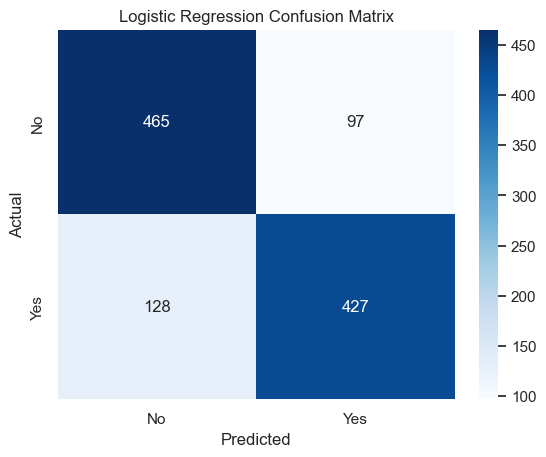

In [14]:
# use the model to make predictions on the test data
y_pred = lr_model.predict(X_test)

# evaluate the model using classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# plot the confusion matrix using seaborn
sns.set_theme()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

To create a random forest classifier pipeline, we use the make_pipeline() function and RandomForestClassifier()function:

In [15]:
# create a random forest classifier pipeline
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=160))

then define hyperparameters to search over and create a grid search object with cross-validation:

In [16]:
# define hyperparameters to search over
rf_params = {
             'randomforestclassifier__criterion' :['gini', 'entropy'],
             'randomforestclassifier__max_features': ['sqrt', 'log2'],
             'randomforestclassifier__max_depth' : [6,7,8],}

# create a grid search object with cross-validation
rf_grid = GridSearchCV(rf_pipeline, rf_params, scoring='accuracy', cv=5)

then fit the grid search object to the training data, get the best model from the grid search, and use the best model to make predictions on the test data:

In [17]:
# fit the grid search object to the training data
rf_grid.fit(X_train, y_train)

# get the best model from the grid search
rf_model = rf_grid.best_estimator_

# use the best model to make predictions on the test data
y_pred = rf_model.predict(X_test)

To evaluate the random forest classifier model, we use the classification_report() function and plot the confusion matrix using seaborn:

Random Forest Classification Report:
              precision    recall  f1-score   support

          no       0.87      0.81      0.84       562
         yes       0.82      0.88      0.85       555

    accuracy                           0.84      1117
   macro avg       0.85      0.84      0.84      1117
weighted avg       0.85      0.84      0.84      1117



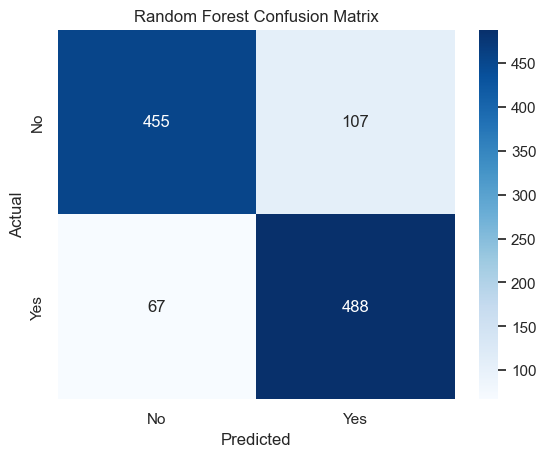

In [18]:
# evaluate the model using classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()